Johanna Bintal Vitale FAYE: Audit  
Almamy Youssouf LY: IA  
Coumba SY: IA

# Exercice 2: Théorme central limite et simulation sous Python

In [1]:
import random 
import numpy as np #importation de la bibliothéque numpy pour effectuer des calculs numéiques
import matplotlib.pyplot as plt # importation du module pyplot de la bibliothéque matplotlib pour la visualisati

#### 1_Tirage de n variables 

In [2]:
#création d'une fonction qui nous permet de générer aléatoirement des nombres suivant la loi du khi-deux à 2 degré de liberté
def generer(df,n): 
    #df: degree of freedom (degré de liberté) 
    #n: taille de l'échantillon
    yi = np.random.chisquare(df,n)  #générer aléatoirement des yi 
    return yi


print("Les réalistations {y1,...,yn} des variables {Y1,...,Y2} sont:", generer(2,10000))  

Les réalistations {y1,...,yn} des variables {Y1,...,Y2} sont: [0.86473153 0.30634441 2.75574616 ... 2.61572518 0.62854009 1.63480921]


#### 2_moyenne empirique de cette réalisation

In [3]:
#définition d'une fonction qui nous permet de calculer la moyenne empirique des valeurs générées ie les yi
def moyenne_empirique(df,n):  
    return np.mean(generer(df, n)) #retourne la moyenne


print("Les réalistations {y1,...,yn} des variables {Y1,...,Y2} sont:", moyenne_empirique(2,10000))  

Les réalistations {y1,...,yn} des variables {Y1,...,Y2} sont: 2.0267209343532637


#### 3_moyenne empirique de la réalisation de zn

In [4]:
#définition d'une fonction qui permet de calculer la moyenne empirique de la variable Zn
def moyenne_empiriqueZn(df,n):
    return np.sqrt(n)*((moyenne_empirique(df,n) - 2)/2)


print("La réalistation de la variable zn est:", moyenne_empiriqueZn(2,10000))

La réalistation de la variable zn est: 0.6671055554124283


#### 4_Répétition de l'expérience

In [5]:
#définition d'une fonction qui nous permet de calculer la moyenne en répétant N fois les opérations 1,2 et 3 
def generer_moy(df , n, N):
    liste = [] #création d'une liste vide dans laquelle on va stocker les valeurs des moyennes empiriques de Zn
    for i in range(N):
        zn = np.sqrt(n)*((moyenne_empirique(df,n) - 2)/2) #appelle de la fonction moyenne_empirique qui permet de calculer la moyenne empirique de Zn 
        liste.append(zn)
    return liste

print("Les moyennes empiriques de 5000 réalisations de la variable zn sont:", generer_moy(2, 10000, 5000))

Les moyennes empiriques de 5000 réalisations de la variable zn sont: [0.7165427346672582, 0.133554944019032, 0.4399357080096644, 0.1292581764852141, 0.5094696071397564, 0.728332053921954, -0.10836634989540572, -0.5407408586610485, 1.9656358134483076, 0.8990715495499346, -0.8288668566682311, -1.7507164859343005, 0.0675706932668163, -0.6714508100273964, 0.17745407931855084, -0.40170786713153994, 1.3641702057100913, 0.26598361547245375, 0.8351159782470585, -0.3859871910728896, 1.6681766660360253, 0.808043930715141, -0.13174924912892072, -1.5768246023210142, 0.7929628531582633, 0.3072727960333088, -0.6137261656383508, 1.2222524614238672, -0.07703505628376961, 0.3805307125931856, 0.5565596048801913, -0.2595064964586724, 0.1616287542203665, 0.822077214811423, 0.6850041861414802, -1.2081571395559876, 0.3322182539797103, 0.12108030729549579, -0.39847706478529643, 1.9659796652167216, -0.32386780488526945, -0.6526352265882829, 0.06433767451725636, -0.4930402511259313, 1.4495440151071737, -1.1960

#### 5_Construction de l'histogramme de ces 5000 réalisations

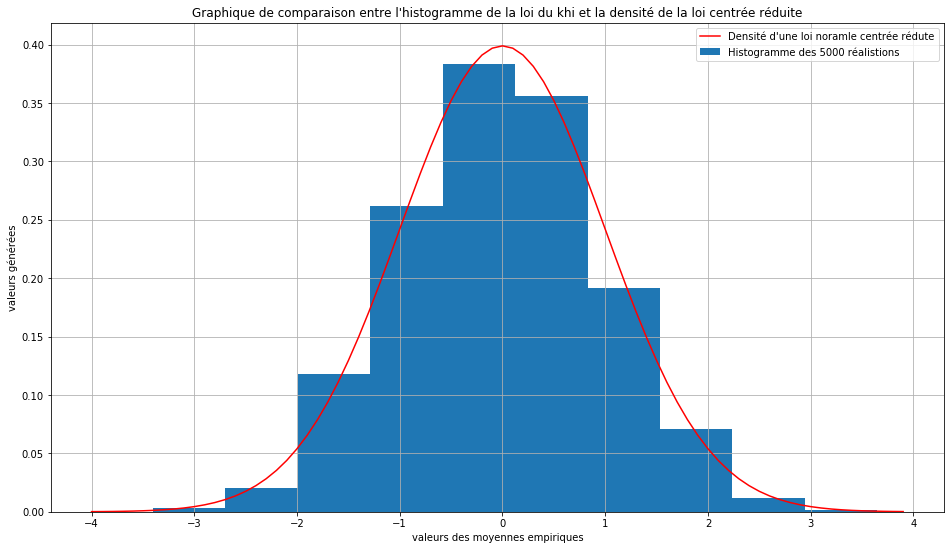

In [7]:
simulation = generer_moy(2, 1000, 5000) #on stocke la fonction dans une vla variable simulation
p1 = plt.hist(simulation, density = True, label="Histogramme des 5000 réalistions") # simulation: valeur d'entrée contenant les arguments de la loi Binomiale,edgecolor permet de distinguer chaque bande de l'histogramme, label = "simulation" place le mot dans la légende,densité: Si Truele premier élément du tuple de retour sera le nombre uniforme pour former une densité de probabilité 

#définition d'une fonction de la densité de la loi normale centrée réduite
from math import sqrt, exp, pi
def densite_normale(x, mean, sigma):
    #mean: moyenne
    #sigma: écart-type
    return exp(- (x-mean)**2 / (2 * sigma**2)) / (sigma * sqrt(2 * pi))

intervalle = [x/10 for x in range(-40, 40)] #création d'une liste contenant les valeurs de x qui sont les valeurs de subdivion des interalles c'est à dire au niveau de l'axe des abscisses on aura des valeurs compris entre -4 et 4
p2 = plt.plot(intervalle,[densite_normale(x,0,sigma=1) for x in intervalle], "r",label = "Densité d'une loi noramle centrée rédute") #représentation de la densité de la loi normale centrée et réduite

plt.legend()
plt.title("Graphique de comparaison entre l'histogramme de la loi du khi et la densité de la loi centrée réduite") #affiche le titre
plt.rcParams["figure.figsize"] = [16,9] #paramétrage du fenêtre graphique utliser rcParams
#plt.savefig("Graphique de comparaison.png", bbox_inches = "tight")# bbox = "tight" permet de bien proportionner le graphique lors de l'enregistrement
plt.grid() #cadrillage du graphe
plt.xlabel("valeurs des moyennes empiriques")
plt.ylabel("valeurs générées")
plt.draw() #efface les messages au dessus du graphique

#### Conclusion:
On voit que l'histogramme et la densité ont pratiquement la même allure. Ils ont une moyenne centrée en 0 et les écarts des intervalles sont de 1. Donc d'aprés le théoréme centrale limite les 5000 réalisations de la variable Zn converge en loi vers la loi normale centrée et réduite: N (0, 1).
